<a href="https://colab.research.google.com/github/SamuelRoblesArce/Proyectos-de-BI/blob/main/BI_Multicategoria_%2B_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-insurance-claim-data/car_insurance_claim.csv


In [ ]:
import pandas as pd

In [ ]:
# Define the path
pd_path = '/kaggle/input/car-insurance-claim-data/car_insurance_claim.csv'  # Assuming a CSV file named car_insurance_claim.csv

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(pd_path)
    print("DataFrame loaded successfully!")
    print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: The file at {pd_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame loaded successfully!
          ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349      No   
1  132761049         0  21JAN56  43.0         0  11.0  $91,449      No   
2  921317019         0  18NOV51  48.0         0  11.0  $52,881      No   
3  727598473         0  05MAR64  35.0         1  10.0  $16,039      No   
4  450221861         0  05JUN48  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS  ... CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED MVR_PTS  \
0        $0    z_No  ...  Minivan     yes   $4,461         2      No       3   
1  $257,252    z_No  ...  Minivan     yes       $0         0      No       0   
2        $0    z_No  ...      Van     yes       $0         0      No       2   
3  $124,191     Yes  ...    z_SUV      no  $38,690         2      No       3   
4  $306,251     Yes  ...  Minivan     yes       $0         0      No       0   

   CLM_AMT CAR_AGE CLAIM_FLAG           URB

In [ ]:
df.head()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349      No   
1  132761049         0  21JAN56  43.0         0  11.0  $91,449      No   
2  921317019         0  18NOV51  48.0         0  11.0  $52,881      No   
3  727598473         0  05MAR64  35.0         1  10.0  $16,039      No   
4  450221861         0  05JUN48  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS  ... CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED MVR_PTS  \
0        $0    z_No  ...  Minivan     yes   $4,461         2      No       3   
1  $257,252    z_No  ...  Minivan     yes       $0         0      No       0   
2        $0    z_No  ...      Van     yes       $0         0      No       2   
3  $124,191     Yes  ...    z_SUV      no  $38,690         2      No       3   
4  $306,251     Yes  ...  Minivan     yes       $0         0      No       0   

   CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
0       $0    18.0          0  Highly Urban/ Urban  
1       $0     1.0          0  Highly Urban/ Urban  
2       $0    10.0          0  Highly Urban/ Urban  
3       $0    10.0          0  Highly Urban/ Urban  
4       $0     6.0          0  Highly Urban/ Urban  

[5 rows x 27 columns]

In [ ]:
df.dtypes

ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

ID              int64
KIDSDRIV        int64           
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [ ]:
df.describe()

ID      KIDSDRIV           AGE      HOMEKIDS          YOJ  \
count  1.030200e+04  10302.000000  10295.000000  10302.000000  9754.000000   
mean   4.956631e+08      0.169288     44.837397      0.720443    10.474062   
std    2.864675e+08      0.506512      8.606445      1.116323     4.108943   
min    6.317500e+04      0.000000     16.000000      0.000000     0.000000   
25%    2.442869e+08      0.000000     39.000000      0.000000     9.000000   
50%    4.970043e+08      0.000000     45.000000      0.000000    11.000000   
75%    7.394551e+08      0.000000     51.000000      1.000000    13.000000   
max    9.999264e+08      4.000000     81.000000      5.000000    23.000000   

           TRAVTIME           TIF      CLM_FREQ       MVR_PTS      CAR_AGE  \
count  10302.000000  10302.000000  10302.000000  10302.000000  9663.000000   
mean      33.416424      5.329159      0.800718      1.710153     8.298148   
std       15.869687      4.110795      1.154079      2.159015     5.714450   
min        5.000000      1.000000      0.000000      0.000000    -3.000000   
25%       22.000000      1.000000      0.000000      0.000000     1.000000   
50%       33.000000      4.000000      0.000000      1.000000     8.000000   
75%       44.000000      7.000000      2.000000      3.000000    12.000000   
max      142.000000     25.000000      5.000000     13.000000    28.000000   

         CLAIM_FLAG  
count  10302.000000  
mean       0.266550  
std        0.442177  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [ ]:
# Cuenta los valores NaN por columna
nan_counts = df.isnull().sum()

print("Número de valores NaN por columna:")
print(nan_counts)

Número de valores NaN por columna:
ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64


# Convertir data

# Convertir Income

In [ ]:
import numpy as np


# 1. Eliminar el signo de dólar '$' y las comas ','
#    Aseguramos que los valores sean cadenas antes de aplicar .str.replace
df['INCOME'] = df['INCOME'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 2. Convertir la columna a tipo numérico (float)
#    errors='coerce' convertirá cualquier valor que no sea numérico (incluyendo 'NaN' como cadena) a NaN de NumPy.
df['INCOME'] = pd.to_numeric(df['INCOME'], errors='coerce')

In [ ]:
df['INCOME'].dtype

dtype('float64')

In [ ]:
df['INCOME'].head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0    67349.0
1    91449.0
2    52881.0
3    16039.0
4        NaN
Name: INCOME, dtype: float64

In [ ]:
df['INCOME'].isnull().sum()

570

In [ ]:
df['INCOME'].describe()

count      9732.000000
mean      61572.073263
std       47457.202749
min           0.000000
25%       27584.000000
50%       53529.000000
75%       86166.000000
max      367030.000000
Name: INCOME, dtype: float64

# Convertir Home_val

In [ ]:
# 1. Reemplazar el signo de dólar '$' y las comas ','
#    Aseguramos que los valores sean cadenas antes de aplicar .str.replace
df['HOME_VAL'] = df['HOME_VAL'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 2. Convertir la columna a tipo numérico (float)
#    errors='coerce' convertirá cualquier valor que no sea numérico a NaN (NumPy).
df['HOME_VAL'] = pd.to_numeric(df['HOME_VAL'], errors='coerce')

In [ ]:
df['HOME_VAL'].isnull().sum()

575

In [ ]:
df['HOME_VAL'].describe()

count      9727.000000
mean     154523.018608
std      129188.439405
min           0.000000
25%           0.000000
50%      160661.000000
75%      238256.000000
max      885282.000000
Name: HOME_VAL, dtype: float64

# Convertir valor del vehículo

In [ ]:
# 1. Reemplazar el signo de dólar '$' y las comas ','
#    Aseguramos que los valores sean cadenas antes de aplicar .str.replace
df['BLUEBOOK'] = df['BLUEBOOK'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 2. Convertir la columna a tipo numérico (float)
#    errors='coerce' convertirá cualquier valor que no sea numérico a NaN (NumPy).
df['BLUEBOOK'] = pd.to_numeric(df['BLUEBOOK'], errors='coerce')

In [ ]:
df['BLUEBOOK'].isnull().sum()

0

In [ ]:
df['BLUEBOOK'].describe()

count    10302.000000
mean     15659.923316
std       8428.765264
min       1500.000000
25%       9200.000000
50%      14400.000000
75%      20890.000000
max      69740.000000
Name: BLUEBOOK, dtype: float64

# Convertir OLDCLAIM

In [ ]:
# 1. Reemplazar el signo de dólar '$' y las comas ','
#    Aseguramos que los valores sean cadenas antes de aplicar .str.replace
df['OLDCLAIM'] = df['OLDCLAIM'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 2. Convertir la columna a tipo numérico (float)
#    errors='coerce' convertirá cualquier valor que no sea numérico a NaN (NumPy).
df['OLDCLAIM'] = pd.to_numeric(df['OLDCLAIM'], errors='coerce')

In [ ]:
df['OLDCLAIM'].isnull().sum()

0

In [ ]:
df['OLDCLAIM'].describe()

count    10302.000000
mean      4033.977868
std       8733.143119
min          0.000000
25%          0.000000
50%          0.000000
75%       4647.500000
max      57037.000000
Name: OLDCLAIM, dtype: float64

# Convertir CLM_AMT

In [ ]:
# 1. Reemplazar el signo de dólar '$' y las comas ','
#    Aseguramos que los valores sean cadenas antes de aplicar .str.replace
df['CLM_AMT'] = df['CLM_AMT'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 2. Convertir la columna a tipo numérico (float)
#    errors='coerce' convertirá cualquier valor que no sea numérico a NaN (NumPy).
df['CLM_AMT'] = pd.to_numeric(df['CLM_AMT'], errors='coerce')


In [ ]:
df['CLM_AMT'].isnull().sum()

0

In [ ]:
df['CLM_AMT'].describe()

count     10302.000000
mean       1511.266453
std        4725.249896
min           0.000000
25%           0.000000
50%           0.000000
75%        1144.750000
max      123247.000000
Name: CLM_AMT, dtype: float64

# Convertir CLAIM_FLAG en categorico

In [ ]:
df['CLAIM_FLAG'] = df['CLAIM_FLAG'].map({0: 'No', 1: 'Yes'})

In [ ]:
df.shape

(10302, 27)

# CAR_AGE: Eliminar negativos

In [ ]:
print((df['CAR_AGE'] < 0).sum())

1


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [ ]:
df[df['CAR_AGE'] < 0]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
8771  676425834         0  02JUN52  47.0         0  12.0  48696.0      No   

      HOME_VAL MSTATUS  ... CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
8771  212014.0    z_No  ...   Pickup      no    33521         3     Yes   

      MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
8771        1     1469    -3.0        Yes  Highly Urban/ Urban  

[1 rows x 27 columns]

In [ ]:
#df = df[df['CAR_AGE'] >= 0].copy()

#aplicamos este codigo para que no elimine los nulls
df = df[(df['CAR_AGE'] >= 0) | (df['CAR_AGE'].isna())].copy()
print((df['CAR_AGE'] < 0).sum())

0


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [ ]:
df['CAR_AGE'].describe()

count    9662.000000
mean        8.299317
std         5.713590
min         0.000000
25%         1.000000
50%         8.000000
75%        12.000000
max        28.000000
Name: CAR_AGE, dtype: float64

In [ ]:
df.shape

(10301, 27)

# Eliminar la Columna Birth y ID

In [ ]:
df = df.drop(columns='ID')

In [ ]:
df = df.drop(columns='BIRTH')

In [ ]:
df.shape

(10301, 25)

# Tratamiento de nulos

In [ ]:
# Cuenta los valores NaN por columna
nan_counts = df.isnull().sum()

print("Número de valores NaN por columna:")
print(nan_counts)

Número de valores NaN por columna:
KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64


Aquí no se puede aplicar shapiro por qué tenemos más de 5k datos por lo que usaremos Anderson Darling.

In [ ]:
from scipy.stats import anderson

cols_to_check = ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE']

for col in cols_to_check:
    col_data = df[col].dropna()

    if len(col_data) < 20:
        print(f"\n⚠️ {col}: pocos datos para aplicar Anderson-Darling.")
        continue

    result = anderson(col_data, dist='norm')
    ad_stat = result.statistic
    crit_5 = result.critical_values[2]  # umbral al 5% de significancia

    print(f"\n📊 {col}")
    print(f"  • Estadístico AD: {ad_stat:.4f}")
    print(f"  • Umbral (5%):    {crit_5:.4f}")

    if ad_stat > crit_5:
        print("  ❌ No es normal → imputamos con MEDIANA")
        df[col] = df[col].fillna(col_data.median())
    else:
        print("  ✅ Compatible con normalidad → imputamos con MEDIA")
        df[col] = df[col].fillna(col_data.mean())


📊 AGE
  • Estadístico AD: 6.6515
  • Umbral (5%):    0.7870
  ❌ No es normal → imputamos con MEDIANA

📊 YOJ
  • Estadístico AD: 390.7236
  • Umbral (5%):    0.7870
  ❌ No es normal → imputamos con MEDIANA

📊 INCOME
  • Estadístico AD: 143.9612
  • Umbral (5%):    0.7870
  ❌ No es normal → imputamos con MEDIANA

📊 HOME_VAL
  • Estadístico AD: 233.1343
  • Umbral (5%):    0.7870
  ❌ No es normal → imputamos con MEDIANA

📊 CAR_AGE
  • Estadístico AD: 182.2658
  • Umbral (5%):    0.7870
  ❌ No es normal → imputamos con MEDIANA


In [ ]:
# Cuenta los valores NaN por columna
nan_counts = df.isnull().sum()

print("Número de valores NaN por columna:")
print(nan_counts)

Número de valores NaN por columna:
KIDSDRIV        0
BIRTH           0
AGE             0
HOMEKIDS        0
YOJ             0
INCOME          0
PARENT1         0
HOME_VAL        0
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE         0
CLAIM_FLAG      0
URBANICITY      0
dtype: int64


In [ ]:
# Calcular la moda (valor más frecuente)
occupation_mode = df['OCCUPATION'].mode()[0]

# Imputar los valores faltantes con la moda
df['OCCUPATION'] = df['OCCUPATION'].fillna(occupation_mode)

print(f"✅ 'OCCUPATION' imputado con: {occupation_mode}")

✅ 'OCCUPATION' imputado con: z_Blue Collar


# Gráficas exploratorias

In [ ]:
import pandas as pd
import plotly.express as px

print("\n--- Distribuciones de Variables Numéricas con Plotly ---")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    fig = px.histogram(df, x=col, title=f'Distribución de {col}',
                       template="plotly_white", # Un tema limpio
                       marginal="box") # Agrega un box plot en el margen para ver cuartiles y outliers
    fig.show()


--- Distribuciones de Variables Numéricas con Plotly ---


In [ ]:
print("\n--- Distribuciones de Variables Categóricas con Plotly (Corregido) ---")
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    # 1. Obtener los conteos y resetear el índice
    counts_df = df[col].value_counts().reset_index()

    # 2. Renombrar las columnas para mayor claridad y para que Plotly las entienda
    # La columna de categorías se llamará 'Category', y la de conteos 'Count'
    counts_df.columns = ['Category', 'Count']

    # 3. Crear el gráfico de barras con los nuevos nombres de columna
    fig = px.bar(counts_df,
                 x='Count',
                 y='Category',
                 title=f'Conteo de {col}',
                 labels={'Count': 'Frecuencia', 'Category': col},
                 orientation='h',
                 template="plotly_white")

    # Opcional: Ordenar las barras por frecuencia (de menor a mayor)
    fig.update_yaxes(categoryorder='total ascending')

    fig.show()


--- Distribuciones de Variables Categóricas con Plotly (Corregido) ---


In [ ]:
df.shape

(10301, 25)

# Relaciones lineales o no lineales

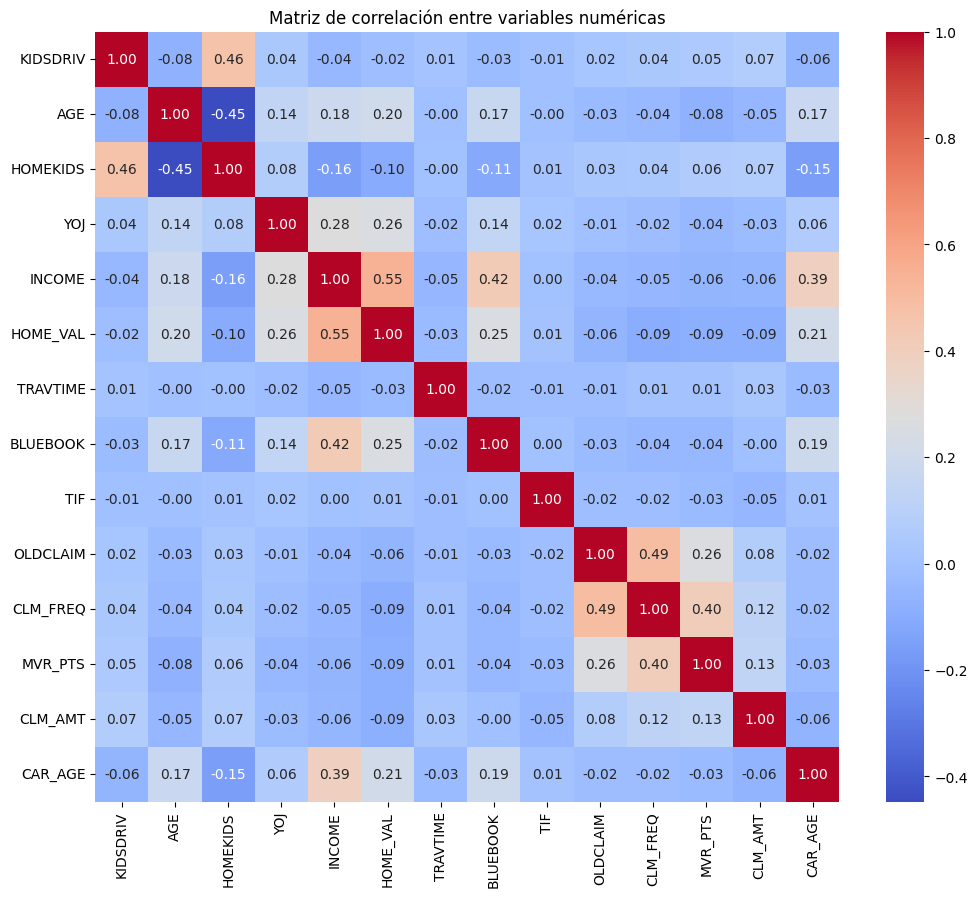

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap de correlación entre variables numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


Las correlaciones son debiles, solo hay 5 relaciones que son moderadas (entre 0.4 y 0.6)

# Aplicamos UMAP

In [ ]:
!pip install umap-learn

2025-06-18 19:37:42.034079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750275462.293547      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750275462.368010      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



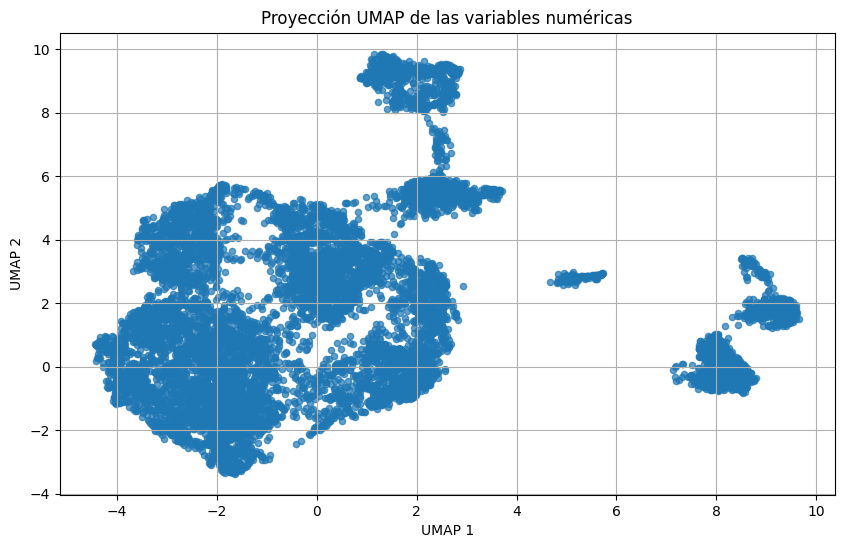

In [ ]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Paso 1: Escalamos las variables numéricas
X = df[numerical_cols]
X_scaled = StandardScaler().fit_transform(X)

# Paso 2: Aplicamos UMAP para reducir a 2 dimensiones
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Paso 3: Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=20, alpha=0.7)
plt.title('Proyección UMAP de las variables numéricas')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



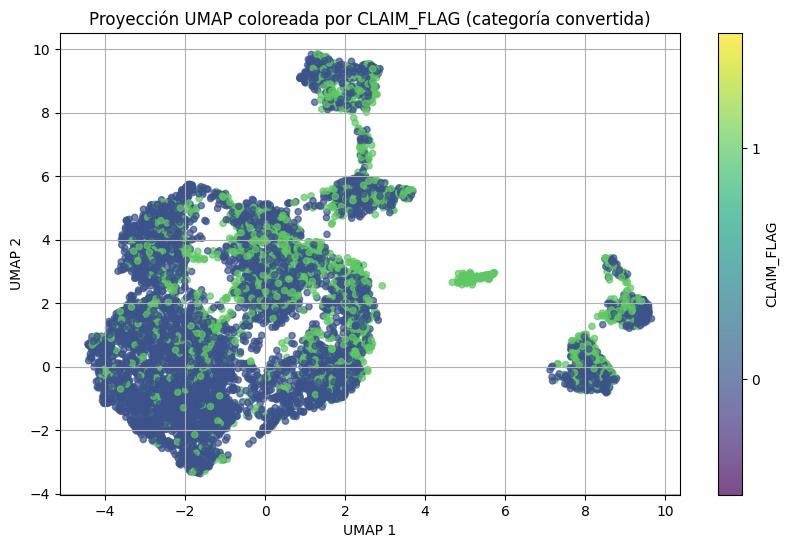

In [ ]:
# Paso 1: Escalamos las variables numéricas
X = df[numerical_cols]
X_scaled = StandardScaler().fit_transform(X)

# Paso 2: Aplicamos UMAP para reducir a 2 dimensiones
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Paso 3: Graficamos los resultados con color según CLAIM_FLAG
color_map = {'No': 0, 'Yes': 1}
colors = df['CLAIM_FLAG'].map(color_map)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    c=colors,
    cmap='viridis',
    s=20,
    alpha=0.7
)
plt.colorbar(scatter, ticks=[0, 1], label='CLAIM_FLAG')
plt.clim(-0.5, 1.5)  # Para que los ticks estén bien centrados
plt.title('Proyección UMAP coloreada por CLAIM_FLAG (categoría convertida)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

Incluir CLAIM_FLAG dentro del input de UMAP altera artificialmente la proyección, ya que el algoritmo incorpora esa variable en el cálculo de distancias, generando agrupaciones que ya conocen de antemano la clase objetivo. Esto puede mejorar visualmente la separación entre clases, pero invalida el propósito exploratorio, porque el gráfico deja de reflejar la estructura real de los datos independientes.

Por eso, en una metáfora visual honesta y analíticamente sólida, CLAIM_FLAG debe excluirse del proceso de reducción de dimensión y usarse únicamente como capa visual (color, forma), para evaluar si las variables explicativas contienen patrones útiles que por sí solos capturan la variabilidad de esa clase.

In [ ]:
# Crear DataFrame con resultados de UMAP
umap_df = pd.DataFrame(X_umap, columns=['UMAP_1', 'UMAP_2'])

# Concatenar con las variables categóricas originales
df_umap = pd.concat([umap_df, df[categorical_cols].reset_index(drop=True)], axis=1)


In [ ]:
df_umap

UMAP_1    UMAP_2 PARENT1 MSTATUS GENDER      EDUCATION  \
0     -0.133969  4.760713      No    z_No      M            PhD   
1     -3.121987  1.122739      No    z_No      M  z_High School   
2     -2.250104  4.103899      No    z_No      M      Bachelors   
3      2.877199  5.542816      No     Yes    z_F  z_High School   
4     -2.775602 -0.526525      No     Yes      M   <High School   
...         ...       ...     ...     ...    ...            ...   
10296  7.647727 -0.218981      No     Yes      M            PhD   
10297 -2.832952 -0.818480      No     Yes      M        Masters   
10298 -3.888444  0.998998      No     Yes    z_F   <High School   
10299 -2.943658  0.108509      No     Yes    z_F      Bachelors   
10300 -2.701115  0.504970      No     Yes    z_F  z_High School   

          OCCUPATION     CAR_USE     CAR_TYPE RED_CAR REVOKED CLAIM_FLAG  \
0       Professional     Private      Minivan     yes      No         No   
1      z_Blue Collar  Commercial      Minivan     yes      No         No   
2            Manager     Private          Van     yes      No         No   
3           Clerical     Private        z_SUV      no      No         No   
4      z_Blue Collar     Private      Minivan     yes      No         No   
...              ...         ...          ...     ...     ...        ...   
10296        Manager     Private      Minivan      no      No         No   
10297  z_Blue Collar  Commercial  Panel Truck      no      No         No   
10298  z_Blue Collar     Private        z_SUV      no      No         No   
10299     Home Maker     Private      Minivan      no      No         No   
10300       Clerical     Private      Minivan      no      No         No   

                  URBANICITY  
0        Highly Urban/ Urban  
1        Highly Urban/ Urban  
2        Highly Urban/ Urban  
3        Highly Urban/ Urban  
4        Highly Urban/ Urban  
...                      ...  
10296    Highly Urban/ Urban  
10297    Highly Urban/ Urban  
10298    Highly Urban/ Urban  
10299    Highly Urban/ Urban  
10300  z_Highly Rural/ Rural  

[10301 rows x 13 columns]

In [ ]:
import plotly.express as px

fig = px.scatter(
    df_umap,
    x='UMAP_1',
    y='UMAP_2',
    color='CLAIM_FLAG',         # Objetivo como color
    symbol='EDUCATION',         # Otra categórica como forma
    hover_data=[col for col in categorical_cols if col != 'EDUCATION'],
    opacity=0.75,
    title='Visualización de diversidad multivariada (UMAP + categóricas)',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(marker=dict(size=6))
fig.show()


Esta visualización por defecto solo acepta 10 categorías como máx.

# Metafora Visual

In [ ]:
parallel_dims = [col for col in categorical_cols if col != 'CLAIM_FLAG']

fig = px.parallel_categories(
    df_umap,
    dimensions=parallel_dims,
    color=df_umap['CLAIM_FLAG'].astype('category').cat.codes,
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Parallel Categories: 10 variables categóricas, color por CLAIM_FLAG'
)

fig.show()

Acá faltan las variables umap 1 y umap 2. Por ello vamos a crear clusters a partir de estas 2 variables.

# Crear clusters con umap 1 y umap 2

In [ ]:
from sklearn.cluster import KMeans

# Clustering UMAP en 4 regiones (puedes ajustar)
kmeans = KMeans(n_clusters=4, random_state=42)
df_umap['UMAP_CLUSTER'] = kmeans.fit_predict(df_umap[['UMAP_1', 'UMAP_2']])

# Convertir a categórica
df_umap['UMAP_CLUSTER'] = 'Cluster ' + df_umap['UMAP_CLUSTER'].astype(str)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_umap

UMAP_1    UMAP_2 PARENT1 MSTATUS GENDER      EDUCATION  \
0     -0.133969  4.760713      No    z_No      M            PhD   
1     -3.121987  1.122739      No    z_No      M  z_High School   
2     -2.250104  4.103899      No    z_No      M      Bachelors   
3      2.877199  5.542816      No     Yes    z_F  z_High School   
4     -2.775602 -0.526525      No     Yes      M   <High School   
...         ...       ...     ...     ...    ...            ...   
10296  7.647727 -0.218981      No     Yes      M            PhD   
10297 -2.832952 -0.818480      No     Yes      M        Masters   
10298 -3.888444  0.998998      No     Yes    z_F   <High School   
10299 -2.943658  0.108509      No     Yes    z_F      Bachelors   
10300 -2.701115  0.504970      No     Yes    z_F  z_High School   

          OCCUPATION     CAR_USE     CAR_TYPE RED_CAR REVOKED CLAIM_FLAG  \
0       Professional     Private      Minivan     yes      No         No   
1      z_Blue Collar  Commercial      Minivan     yes      No         No   
2            Manager     Private          Van     yes      No         No   
3           Clerical     Private        z_SUV      no      No         No   
4      z_Blue Collar     Private      Minivan     yes      No         No   
...              ...         ...          ...     ...     ...        ...   
10296        Manager     Private      Minivan      no      No         No   
10297  z_Blue Collar  Commercial  Panel Truck      no      No         No   
10298  z_Blue Collar     Private        z_SUV      no      No         No   
10299     Home Maker     Private      Minivan      no      No         No   
10300       Clerical     Private      Minivan      no      No         No   

                  URBANICITY UMAP_CLUSTER  
0        Highly Urban/ Urban    Cluster 0  
1        Highly Urban/ Urban    Cluster 2  
2        Highly Urban/ Urban    Cluster 0  
3        Highly Urban/ Urban    Cluster 3  
4        Highly Urban/ Urban    Cluster 2  
...                      ...          ...  
10296    Highly Urban/ Urban    Cluster 1  
10297    Highly Urban/ Urban    Cluster 2  
10298    Highly Urban/ Urban    Cluster 2  
10299    Highly Urban/ Urban    Cluster 2  
10300  z_Highly Rural/ Rural    Cluster 2  

[10301 rows x 14 columns]

In [ ]:
# Incluimos la variable UMAP_ZONE o UMAP_CLUSTER + las categóricas
dims = ['UMAP_CLUSTER'] + [col for col in categorical_cols if col != 'CLAIM_FLAG']

category_order_dict = {
    'UMAP_CLUSTER': sorted(df_umap['UMAP_CLUSTER'].unique()),  # orden alfabético
    # Puedes hacer lo mismo con otras columnas si quieres ordenarlas también
}

fig = px.parallel_categories(
    df_umap,
    dimensions=dims,
    color=df_umap['CLAIM_FLAG'].astype('category').cat.codes,
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Parallel Sets: zonas UMAP + variables categóricas, color por CLAIM_FLAG'
)

fig.update_coloraxes(colorbar=dict(
    title='CLAIM_FLAG',
    tickvals=[0, 1],
    ticktext=['No', 'Yes'],
    len=0.4,
    thickness=12,
    x=1.03,           # ligeramente más a la derecha
    xanchor='left',
    y=1.02,           # ligeramente más arriba
    yanchor='top'
))

fig.show()

In [ ]:
import plotly.graph_objects as go

# Dimensiones categóricas sin CLAIM_FLAG
dims = ['UMAP_CLUSTER'] + [col for col in categorical_cols if col != 'CLAIM_FLAG']

# Agrupamos por todas esas columnas y contamos Claim Yes/No
grouped = (
    df_umap
    .groupby(dims + ['CLAIM_FLAG'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Rellenar faltantes si falta alguna clase
if 'No' not in grouped.columns:
    grouped['No'] = 0
if 'Yes' not in grouped.columns:
    grouped['Yes'] = 0

# Total
grouped['Total'] = grouped['Yes'] + grouped['No']

# Repetimos cada fila por el total (para generar cada flujo)
expanded = grouped.loc[grouped.index.repeat(grouped['Total'])].reset_index(drop=True)

# Asignamos CLAIM_FLAG como 1 (Yes) o 0 (No) directamente
claim_flag_codes = []
for _, row in grouped.iterrows():
    claim_flag_codes += [1]*row['Yes'] + [0]*row['No']

# Creamos las dimensiones para Parcats
dimensions = []
for col in dims:
    dimensions.append(dict(label=col, values=expanded[col]))

# Creamos el gráfico
fig = go.Figure(go.Parcats(
    dimensions=dimensions,
    line=dict(
        color=claim_flag_codes,
        colorscale=[[0, 'lightblue'], [1, 'darkblue']],
        shape='hspline'
    ),
    hoveron='color',
    hoverinfo='count+probability'
))

fig.update_layout(title='Parallel Sets con variables categóricas + UMAP_CLUSTER y CLAIM_FLAG como color')
fig.show()
